<a href="https://colab.research.google.com/github/madilsaleem/Performance-Comparison-of-KSE-100-Index-vs-Gold-Futures/blob/main/KSE_100_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving historical-data-KSE100.xlsx to historical-data-KSE100 (1).xlsx


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual filename
df = pd.read_excel('historical-data-KSE100.xlsx')
df_kse100=df.set_index('Date')
df.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,KSE100,2008-01-01,14075.83,14075.83,13481.23,13666.43,0
1,KSE100,2008-01-02,13666.43,13778.13,13328.57,13353.38,0
2,KSE100,2008-01-03,13353.38,13996.71,13353.38,13996.42,0
3,KSE100,2008-01-04,13996.42,14259.60,13996.42,14259.60,0
4,KSE100,2008-01-07,14259.60,14280.00,14090.47,14163.11,0


In [ ]:
df.tail()

,Symbol,Date,Open,High,Low,Close,Volume
4361,KSE100,2025-08-06,143409.5956,145187.1747,143409.5956,145088.4995,383514758
4362,KSE100,2025-08-07,145793.0681,146081.0277,145250.1791,145647.1353,326588620
4363,KSE100,2025-08-08,145999.3987,146813.4383,144917.1867,145382.7975,276740075
4364,KSE100,2025-08-11,145650.3343,147005.1776,145258.4968,146929.8439,299280724
4365,KSE100,2025-08-12,147467.4442,147976.9832,146894.6274,147005.3232,331786187


,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2008-01-01,KSE100,14075.83,14075.83,13481.23,13666.43,0
2008-01-02,KSE100,13666.43,13778.13,13328.57,13353.38,0
2008-01-03,KSE100,13353.38,13996.71,13353.38,13996.42,0
2008-01-04,KSE100,13996.42,14259.60,13996.42,14259.60,0
2008-01-07,KSE100,14259.60,14280.00,14090.47,14163.11,0


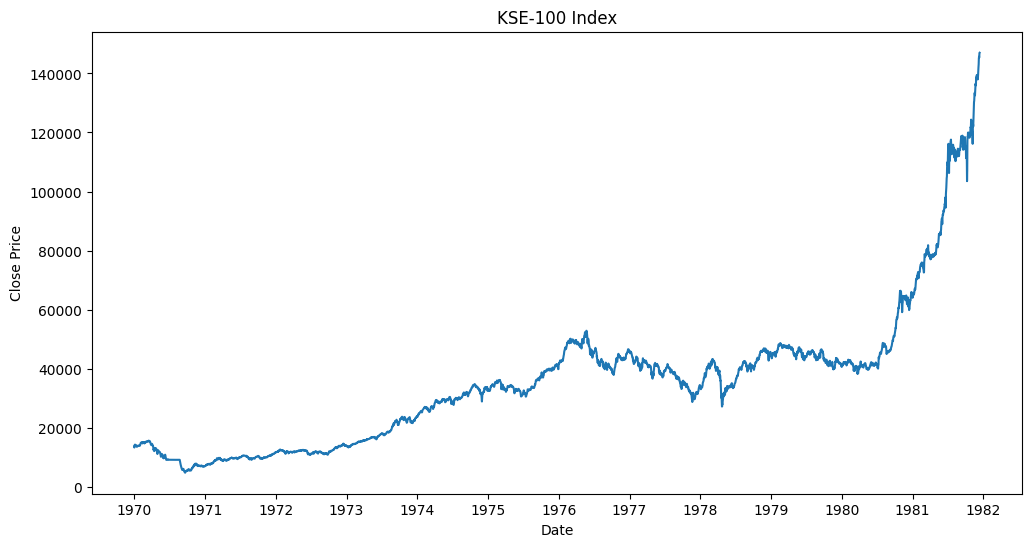

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6)) # Increased figure size
plt.plot(df_kse100.index, df_kse100['Close']) # Explicitly plot index against 'Close'
plt.title('KSE-100 Index')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format the x-axis to show only years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [ ]:
uploaded = files.upload()

Saving historical-data-KMI30.xlsx to historical-data-KMI30.xlsx


In [ ]:
# Replace 'your_file.xlsx' with the actual filename
df_kmi30 = pd.read_excel('historical-data-KMI30.xlsx')
df_kmi30=df_kmi30.set_index('Date')
df_kmi30.tail()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2009-07-08,KMI30,11343.88,11343.88,11175.83,11208.40,0
2009-07-07,KMI30,11245.23,11453.29,11245.24,11343.88,0
2009-07-06,KMI30,11173.03,11265.78,11130.11,11245.23,0
2009-07-03,KMI30,11211.16,11317.07,11129.99,11173.03,0
2009-07-02,KMI30,10871.59,11222.24,10871.59,11211.16,0


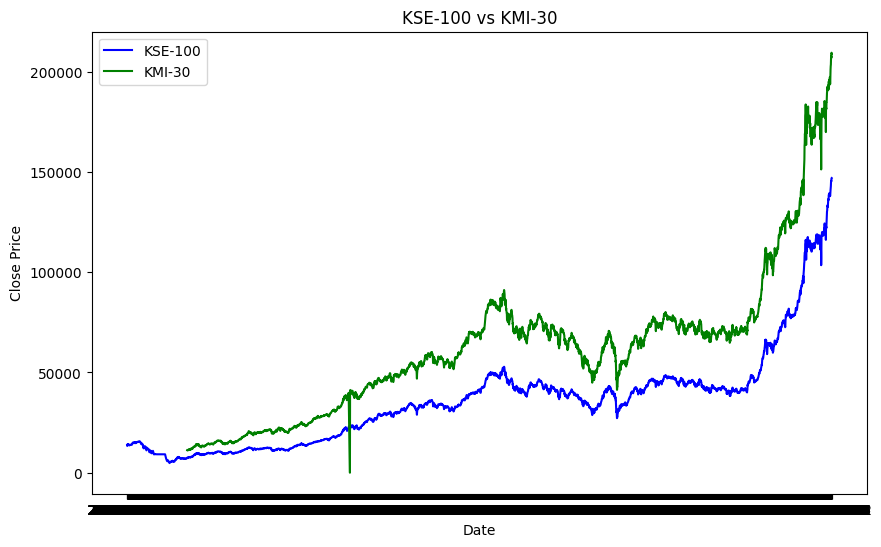

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='KSE-100', color='blue')
plt.plot(df_kmi30['Close'], label='KMI-30', color='green')
plt.title('KSE-100 vs KMI-30')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

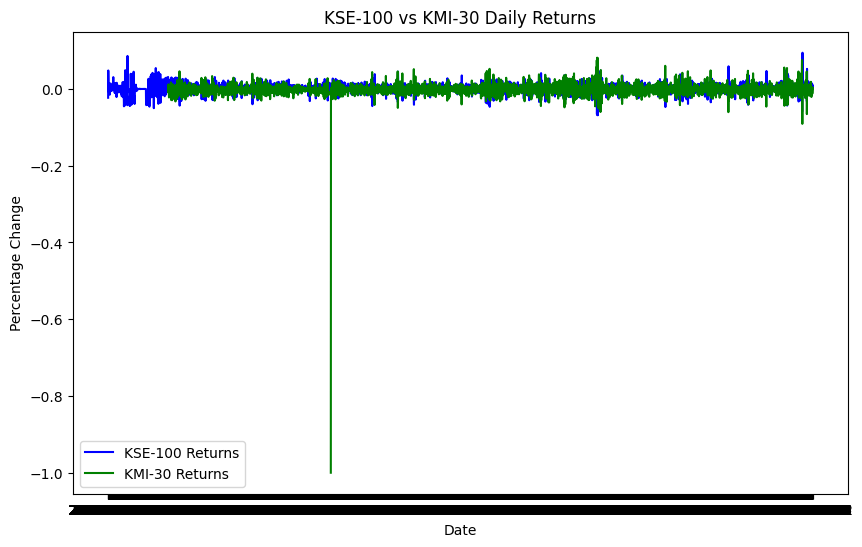

In [ ]:
df['Returns'] = df['Close'].pct_change()
df_kmi30['Returns'] = df_kmi30['Close'].pct_change()

plt.figure(figsize=(10, 6))
plt.plot(df['Returns'], label='KSE-100 Returns', color='blue')
plt.plot(df_kmi30['Returns'], label='KMI-30 Returns', color='green')
plt.title('KSE-100 vs KMI-30 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


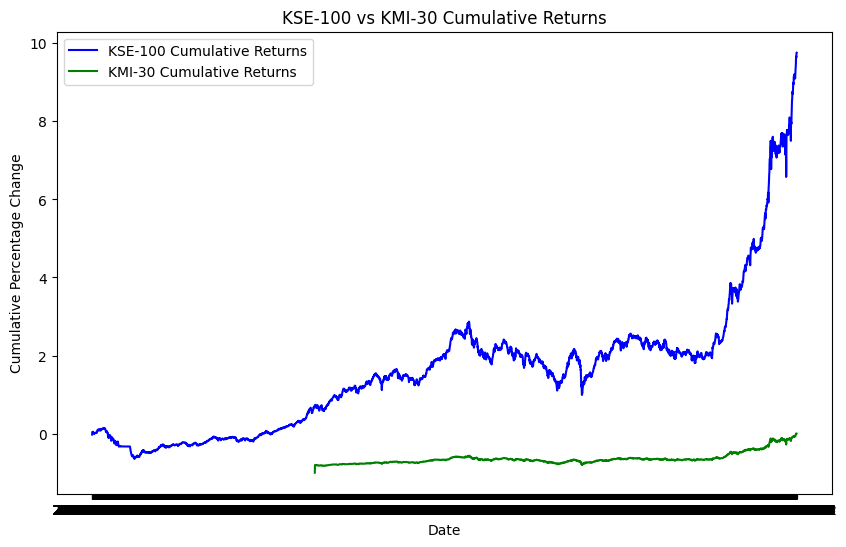

In [ ]:
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod() - 1
df_kmi30['Cumulative_Returns'] = (1 + df_kmi30['Returns']).cumprod() - 1

plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative_Returns'], label='KSE-100 Cumulative Returns', color='blue')
plt.plot(df_kmi30['Cumulative_Returns'], label='KMI-30 Cumulative Returns', color='green')
plt.title('KSE-100 vs KMI-30 Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Change')
plt.legend()
plt.show()

# Task
Compare the cumulative returns of the KSE 100 index and gold (GC=F) by plotting them on the same chart. Fetch the gold data from Yahoo Finance for the same date range as the KSE 100 index data. Color the gold cumulative returns plot red and the KSE 100 cumulative returns plot blue.

## Fetch gold data

### Subtask:
Fetch historical gold price data (GC=F) from Yahoo Finance for the date range of the KSE 100 index data.


**Reasoning**:
Fetch historical gold price data using yfinance for the same date range as the KSE 100 index data.



In [ ]:
import yfinance as yf

gold_ticker = 'GC=F'
start_date = df.index.min()
end_date = df.index.max()

df_gold = yf.download(gold_ticker, start=start_date, end=end_date)

/tmp/ipython-input-3859242310.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_gold = yf.download(gold_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


**Reasoning**:
Display the first few rows of the downloaded gold data to verify the data and the date range.



In [ ]:
df_gold.head()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2008-01-02,857.000000,857.799988,846.400024,848.700012,130
2008-01-03,866.400024,865.500000,856.299988,863.000000,181
2008-01-04,863.099976,865.500000,860.200012,861.400024,28
2008-01-07,859.599976,860.900024,857.400024,860.900024,4
2008-01-08,878.000000,879.400024,861.599976,861.599976,21


**Reasoning**:
Display the last few rows of the downloaded gold data to verify the end date.



In [ ]:
df_gold.tail()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2025-08-05,3381.899902,3387.199951,3351.199951,3378.500000,915
2025-08-06,3380.000000,3383.300049,3361.300049,3380.699951,1492
2025-08-07,3400.300049,3422.899902,3384.899902,3384.899902,5464
2025-08-08,3439.100098,3477.000000,3402.500000,3438.800049,7657
2025-08-11,3353.100098,3383.899902,3349.199951,3383.899902,1488


## Data preparation

### Subtask:
Process the fetched gold data, including setting the 'Date' as the index and calculating the daily and cumulative returns.


**Reasoning**:
Set the 'Date' column as the index and calculate the daily and cumulative returns for the gold data.



In [ ]:
df_gold['Returns'] = df_gold['Close'].pct_change()
df_gold['Cumulative_Returns'] = (1 + df_gold['Returns']).cumprod() - 1
df_gold.head()

Price,Close,High,Low,Open,Volume,Returns,Cumulative_Returns
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,,
Date,,,,,,,
2008-01-02,857.000000,857.799988,846.400024,848.700012,130,NaN,NaN
2008-01-03,866.400024,865.500000,856.299988,863.000000,181,0.010969,0.010969
2008-01-04,863.099976,865.500000,860.200012,861.400024,28,-0.003809,0.007118
2008-01-07,859.599976,860.900024,857.400024,860.900024,4,-0.004055,0.003034
2008-01-08,878.000000,879.400024,861.599976,861.599976,21,0.021405,0.024504


**Reasoning**:
The previous attempt failed because 'Date' was not a column in `df_gold`. I need to inspect the dataframe to see what the correct column name is.



/tmp/ipython-input-247388734.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(df_gold['Cumulative_Returns'], label='Gold Cumulative Returns', color='red')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x7a985843d150>.

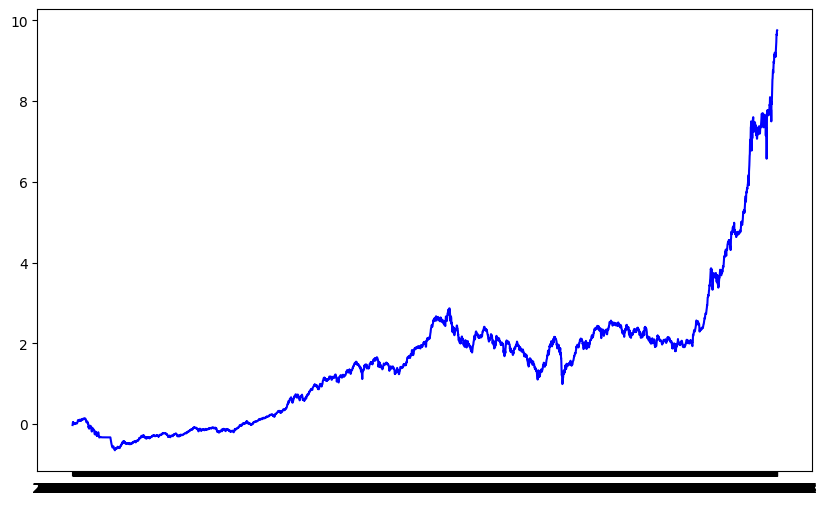

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative_Returns'], label='KSE-100 Cumulative Returns', color='blue')
plt.plot(df_gold['Cumulative_Returns'], label='Gold Cumulative Returns', color='red')
plt.title('KSE-100 vs Gold Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Change')
plt.legend()
plt.show()

In [ ]:
print(df.index.dtype)
print(df_gold.index.dtype)

object
datetime64[ns]


In [ ]:
print(df_kse100.index.min())
print(df_kse100.index.max())